In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import misc

In [2]:
# Takes in text file of darkNet coords and
# converts [center x, center y, width height]
# to [y_min, x_min, y_max, x_max]

def convert_bb(labels):
    
#   Read text file
    labels = open(labels, 'r')
    
    old_boxes = []
    while True:
        line = labels.readline()
        line = line.strip()
        line = line.split()
#       Convert classes to ints and values to floats
        for i in range(len(line)):
            if len(line[i]) > 1:
                line[i] = float(line[i])
            else:
                line[i] = int(line[i])
        if line == []:
            break
        old_boxes.append(line)
    
#   [batch, number of bounding boxes, coords]
    num_boxes = len(old_boxes)
    boxes = np.zeros([1,num_boxes,4])
    
    for i in range(num_boxes):
        boxes[:,i,0] = (old_boxes[i][2]-old_boxes[i][4]/2)
        boxes[:,i,1] = (old_boxes[i][1]-old_boxes[i][3]/2)
        boxes[:,i,2] = (old_boxes[i][2]+old_boxes[i][4]/2)
        boxes[:,i,3] = (old_boxes[i][1]+old_boxes[i][3]/2)
    
    return num_boxes, boxes, old_boxes

In [3]:
num, boxes, old_boxes = convert_bb('labels.txt')

In [4]:
img = mpimg.imread('dice.jpg')

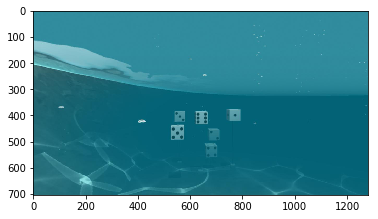

In [5]:

plt.imshow(img.reshape(704,1280,3))
plt.show()

In [6]:
img = img.reshape(1,704,1280,3)

In [7]:
img = tf.convert_to_tensor(img, np.float32)

In [8]:
box = tf.convert_to_tensor(boxes[:,:,:], np.float32)

In [9]:
box

<tf.Tensor 'Const_1:0' shape=(1, 6, 4) dtype=float32>

In [10]:
test = tf.image.draw_bounding_boxes(img, box)

In [11]:
sess = tf.Session()

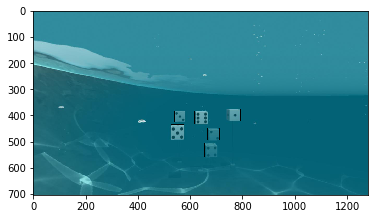

In [12]:
image = (sess.run(test).reshape(704,1280,3))
plt.imshow(image/255)
plt.show()

In [13]:
box.shape

TensorShape([Dimension(1), Dimension(6), Dimension(4)])

In [14]:
# Matplot messes up RGB can use OpenCV to fix use scipy instead
misc.imshow(image)

In [15]:
#TODO: Augment and make new images with bounding boxes convertin tf box format back to yolo format

In [16]:
img = tf.reshape(img,[704,1280,3])
begin, size, bbox_for_draw = sess.run(tf.image.sample_distorted_bounding_box(
    image_size = tf.shape(img),
    bounding_boxes=box,
    min_object_covered=0.25,
    aspect_ratio_range=[0.75, 1.33],
    area_range=[0.25, 1],
    max_attempts=100,
    use_image_if_no_bounding_boxes=False))
    

In [17]:
#boxes = tf.stack([box,bbox_for_draw], axis=2)

In [18]:
image_with_box = tf.image.draw_bounding_boxes(tf.expand_dims(img, 0),
                                                  boxes[-1,:,:,:])
tf.summary.image ('images_with_box', image_with_box)

IndexError: too many indices for array

In [ ]:
image = sess.run(image_with_box)[-1,:,:,:]
plt.imshow(image)
plt.show()

In [ ]:
misc.imshow(image)

In [ ]:
distorted_image = sess.run(tf.slice(img, begin, size))


In [ ]:
plt.imshow(distorted_image)
plt.show()